<a href="https://colab.research.google.com/github/dipayandas97/Spiking-Neural-Network/blob/master/Spike_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

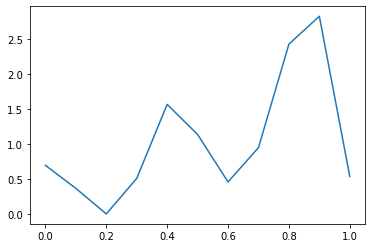

In [106]:
L = 1
dt = 0.1
time = np.arange(0, L+dt, dt)
signal = np.random.normal(loc=0, scale=1.0, size=time.shape[0])
signal += np.abs(np.min(signal))
plt.plot(time, signal)
plt.show()

#Temporal Contrast | Fixed Threshold based

##Encoding

Threshold: 1.369


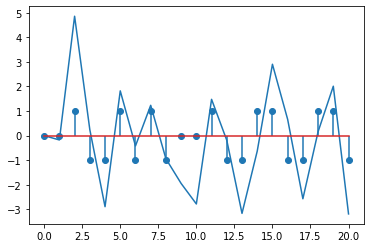

In [91]:
spikes = []
input_length = signal.shape[0]
factor = 0.5

#calculate running difference
diff = []
diff.append(0)

for t in range(1, input_length):
    diff.append(signal[t] - signal[t-1])

#calculate threshold
threshold = np.mean(diff) + factor*np.std(diff)

#generate spike train
for t in range(input_length):
    if diff[t] > threshold:
        spikes.append(1)
    elif diff[t] < -threshold:
        spikes.append(-1)
    else:
        spikes.append(0)
        
print('Threshold: {:.3f}'.format(threshold))
plt.plot(signal)
plt.stem(spikes, use_line_collection=True)
plt.show()

##Decoding

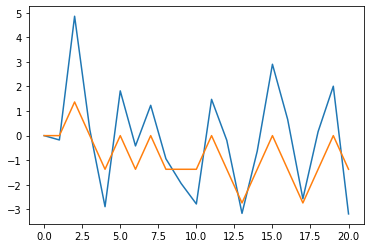

In [93]:
#spikes : encoded spike
#threshold : pre-determined threshold
#length = input_length
output_signal = np.zeros(len(spikes))

for t in range(1, input_length):
    if spikes[t] > 0:
        output_signal[t] = output_signal[t-1] + threshold
    elif spikes[t] < 0:
        output_signal[t] = output_signal[t-1] - threshold
    else:
        output_signal[t] = output_signal[t-1]

plt.plot(signal)
plt.plot(output_signal)
plt.show()

#Rank Order Coding (ROC)

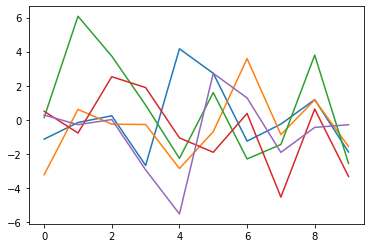

In [169]:
#5 dimensional input vector for 10 timesteps
T=10
signal = np.random.normal(loc=0, scale = 2, size=(T, 5))

for i in signal.T:
    plt.plot(i)

##Encoding

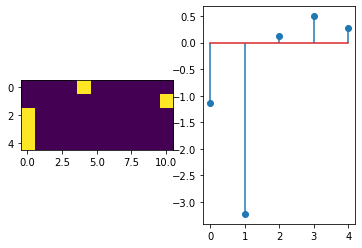

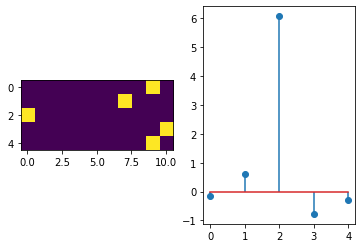

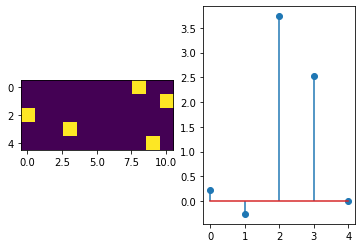

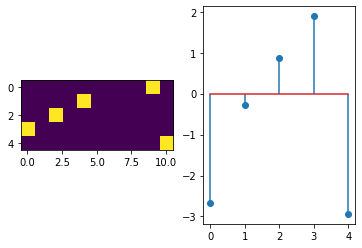

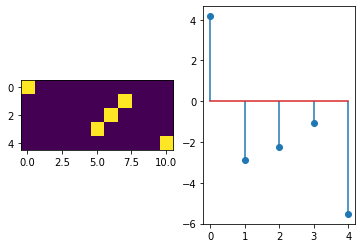

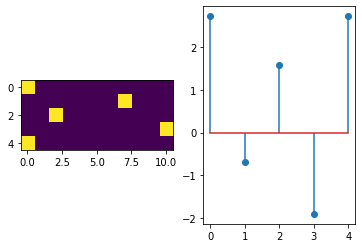

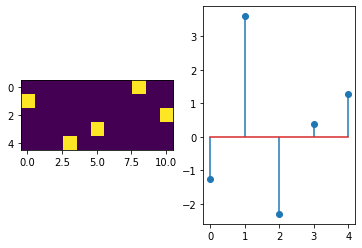

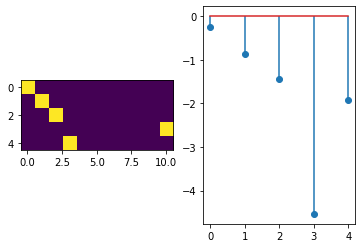

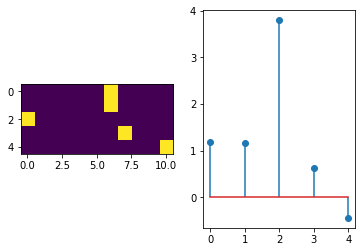

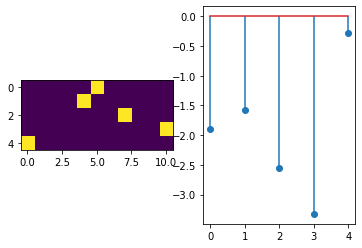

In [170]:
time_window = 10
spike_train = np.zeros((T, 5, time_window+1))

for t in range(signal.shape[0]):
    s = signal[t]
    s = np.max(s) - s
    latency = time_window * ((s - np.min(s))/(np.max(s) - np.min(s)))

    for i in range(latency.shape[0]): #iterate over each dimension of data
        spike_train[t][i][int(latency[i])] = 1        
    plt.subplot(1,2,1)
    plt.imshow(spike_train[t])
    plt.subplot(1,2,2)
    plt.stem(signal[t], use_line_collection=True)
    plt.show()

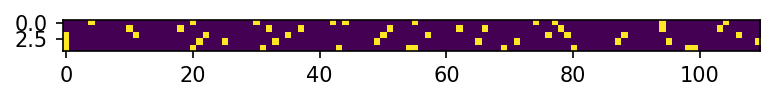

In [182]:
#Total encoded data

seq = spike_train[0]

for w in spike_train[1:]:
    seq = np.hstack((seq, w))
plt.figure(dpi=150)
plt.imshow(seq)

##Decoding

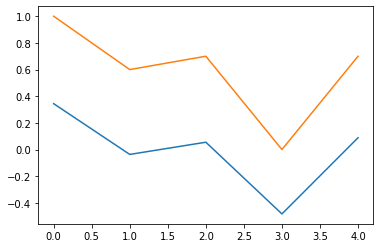

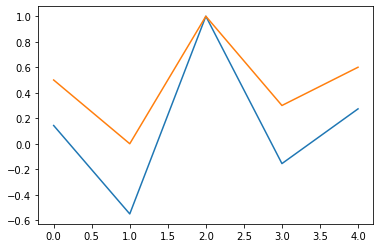

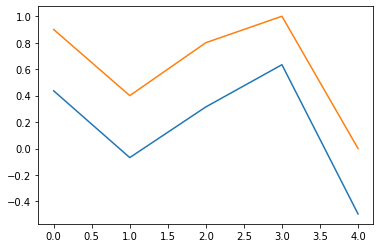

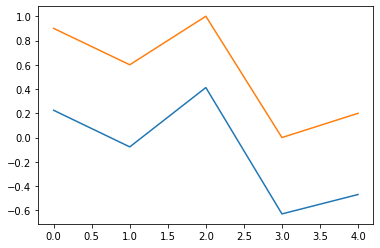

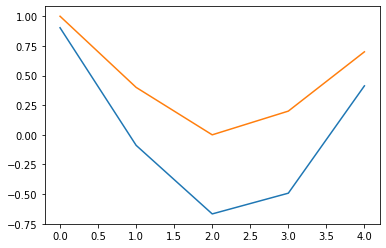

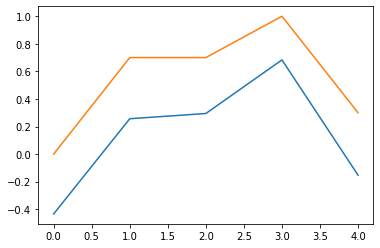

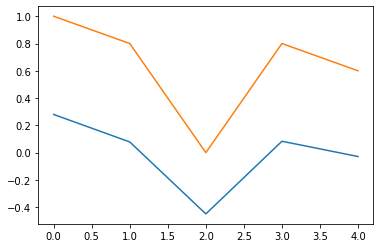

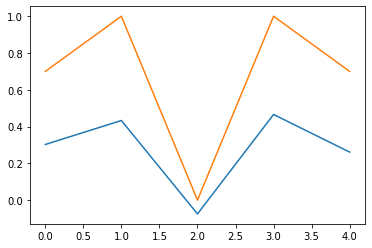

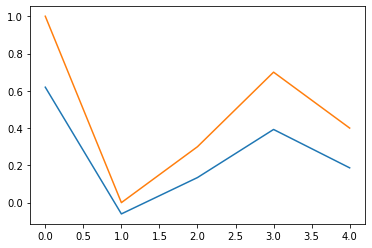

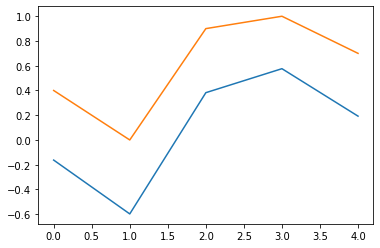

In [168]:
output_signal = []

for t in range(spike_train.shape[0]):
    f = spike_train[t]
    latency = []
    for d in range(f.shape[0]):
        latency.append(time_window - np.argmax(f[d])) #since actual signal is amplitude reversal of latency
    output_signal.append(latency)
    
    plt.plot(signal[t] / np.max(signal))
    plt.plot(latency / np.max(latency))
    plt.show()